# **Data Visualization**

# Objectives


The objective of this notebook is to explore and understand the [IBM HR Analytics Employee Attrition & Performance dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)  through descriptive statistics and visual analysis. The focus is on uncovering key patterns and relationships among employee attributes that influence attrition and performance.

# Input
* The input can be found [here]()
* This is a csv file contained the cleaned data outputted by the ETL process.

# Outputs

- All the visualizations have been saved as PNG files and are stored in a designated folder for easy access and reference, which can be found [here](../Images).

---

# Change working directory
Change the working directory from its current folder to its parent folder as the notebooks will be stored in a subfolder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ramoz\\OneDrive\\Desktop\\employee-turnover-prediction\\jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ramoz\\OneDrive\\Desktop\\employee-turnover-prediction'

Changing path directory to the dataset

In [4]:
#path directory
raw_data_dir = os.path.join(current_dir, 'data_set/raw') 

#path directory
processed_data_dir = os.path.join(current_dir, 'data_set/processed') 


---

# Import packages

In [5]:
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
import plotly.express as px # Import plotly
sns.set_style('whitegrid') # Set style for visuals
from scipy import stats # Import scipy for statistical tests

---

# Load the cleaned dataset

In [25]:
# Coding
cleaned_data_path = os.path.join(processed_data_dir, 'cleaned_employee_attrition.csv') # Load cleaned data
df = pd.read_csv(cleaned_data_path)
df.head() # Display first few rows

,Age,Attrition,DistanceFromHome,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,2,Sales Executive,4,5993,8,Yes,1,0,5
1,49,No,8,2,Research Scientist,2,5130,1,No,3,1,7
2,37,Yes,2,1,Laboratory Technician,3,2090,6,Yes,3,0,0
3,33,No,3,1,Research Scientist,3,2909,1,Yes,3,3,0
4,27,No,2,1,Laboratory Technician,2,3468,9,No,3,2,2


In [26]:
df.info() # Get data info
df.describe(include='all') # Get descriptive statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   DistanceFromHome         1470 non-null   int64 
 3   JobLevel                 1470 non-null   int64 
 4   JobRole                  1470 non-null   object
 5   JobSatisfaction          1470 non-null   int64 
 6   MonthlyIncome            1470 non-null   int64 
 7   NumCompaniesWorked       1470 non-null   int64 
 8   OverTime                 1470 non-null   object
 9   WorkLifeBalance          1470 non-null   int64 
 10  YearsSinceLastPromotion  1470 non-null   int64 
 11  YearsWithCurrManager     1470 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 137.9+ KB


,Age,Attrition,DistanceFromHome,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000
unique,NaN,2,NaN,NaN,9,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,No,NaN,NaN,Sales Executive,NaN,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,1233,NaN,NaN,326,NaN,NaN,NaN,1054,NaN,NaN,NaN
mean,36.923810,NaN,9.192517,2.063946,NaN,2.728571,6502.931293,2.693197,NaN,2.761224,2.187755,4.123129
std,9.135373,NaN,8.106864,1.106940,NaN,1.102846,4707.956783,2.498009,NaN,0.706476,3.222430,3.568136
min,18.000000,NaN,1.000000,1.000000,NaN,1.000000,1009.000000,0.000000,NaN,1.000000,0.000000,0.000000
25%,30.000000,NaN,2.000000,1.000000,NaN,2.000000,2911.000000,1.000000,NaN,2.000000,0.000000,2.000000
50%,36.000000,NaN,7.000000,2.000000,NaN,3.000000,4919.000000,2.000000,NaN,3.000000,1.000000,3.000000
75%,43.000000,NaN,14.000000,3.000000,NaN,4.000000,8379.000000,4.000000,NaN,3.000000,3.000000,7.000000


# Hypothesis 4

#### Distance from Home and Attrition

- Employees who live farther from work are more likely to leave the company.


#### Bar Chart

C:\Users\ramoz\AppData\Local\Temp\ipykernel_14452\2721755960.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rate = df.groupby('DistanceBand')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100


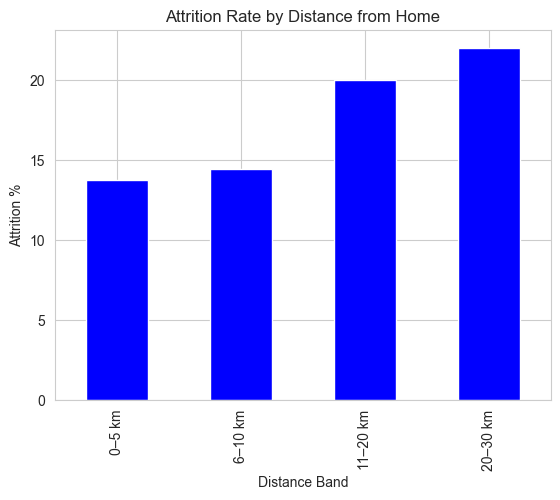

In [13]:
# Coding
# Load the cleaned dataset
df = pd.read_csv(os.path.join(processed_data_dir, 'cleaned_employee_attrition.csv'))

# Create distance bins for better grouping
df['DistanceBand'] = pd.cut(df['DistanceFromHome'],
                            bins=[0, 5, 10, 20, 30],
                            labels=['0–5 km', '6–10 km', '11–20 km', '20–30 km'])

# Calculate attrition rate per distance band
attrition_rate = df.groupby('DistanceBand')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100

# Plot
attrition_rate.plot(kind='bar', color='blue')
plt.title('Attrition Rate by Distance from Home')
plt.ylabel('Attrition %')
plt.xlabel('Distance Band')
plt.show()

### Key Observations:
- The chart shows a positive relationship between Distance from Home and Attrition Rate.
- The chart shows a positive relationship between Distance from Home and Attrition Rate.
- Attrition increases gradually for mid-distance groups (6–10 km → ~14%) and rises sharply for those living beyond 10 km.
- The highest attrition rate (~22%) occurs among employees living 20–30 km from the workplace.

### Conclusion:
- The results support the hypothesis:

- Employees who live farther from work are more likely to leave the company.

- This suggests commuting distance is a meaningful factor influencing employee retention.

- Possible reasons include longer travel times, higher commuting costs, and fatigue.

---

# Hypothesis 5

#### Career Growth and Retention

 Employees with fewer promotions or shorter tenure with their manager are more likely to leave.






### Scatter Plot

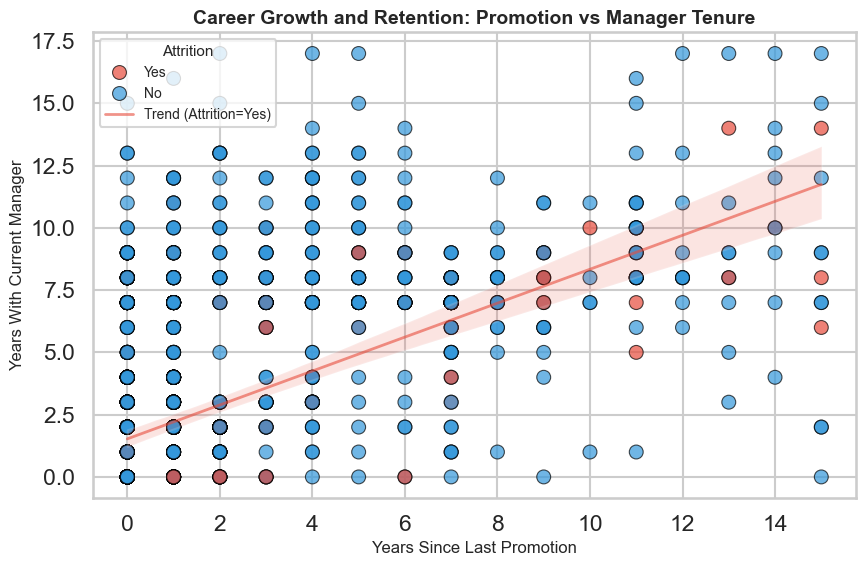

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(os.path.join(processed_data_dir, 'cleaned_employee_attrition.csv'))

# Set style
sns.set(style="whitegrid", context="talk")

# Create scatter plot
plt.figure(figsize=(9,6))
scatter = sns.scatterplot(
    data=df,
    x='YearsSinceLastPromotion',
    y='YearsWithCurrManager',
    hue='Attrition',
    palette={'Yes': '#E74C3C', 'No': '#3498DB'},  # red for Yes, blue for No
    s=100,                # bigger dots
    alpha=0.7,            # transparency
    edgecolor='black'     # outlines for clarity
)

# Optional trend line to show pattern for "Yes"
sns.regplot(
    data=df[df['Attrition'] == 'Yes'],
    x='YearsSinceLastPromotion',
    y='YearsWithCurrManager',
    scatter=False,
    color='#E74C3C',
    line_kws={'linestyle':'-', 'linewidth':2, 'alpha':0.6},
    label='Trend (Attrition=Yes)'
)

# Titles and labels
plt.title('Career Growth and Retention: Promotion vs Manager Tenure', fontsize=14, fontweight='bold')
plt.xlabel('Years Since Last Promotion', fontsize=12)
plt.ylabel('Years With Current Manager', fontsize=12)
plt.legend(title='Attrition', fontsize=10, title_fontsize=11, loc='upper left', frameon=True)
plt.tight_layout()

plt.show()


#### key observation

- The scatter plot shows that employees who left the company (Attrition = Yes) tend to cluster in the lower-left area — meaning they have fewer years since last promotion and shorter tenure with their current manager.

- Employees with longer manager relationships and more time since their last promotion are less likely to leave, as indicated by the more scattered blue (No) points.

- The red dashed trend line suggests a slight positive correlation, showing that attrition risk decreases as tenure and promotion history improve.

### Boxplot

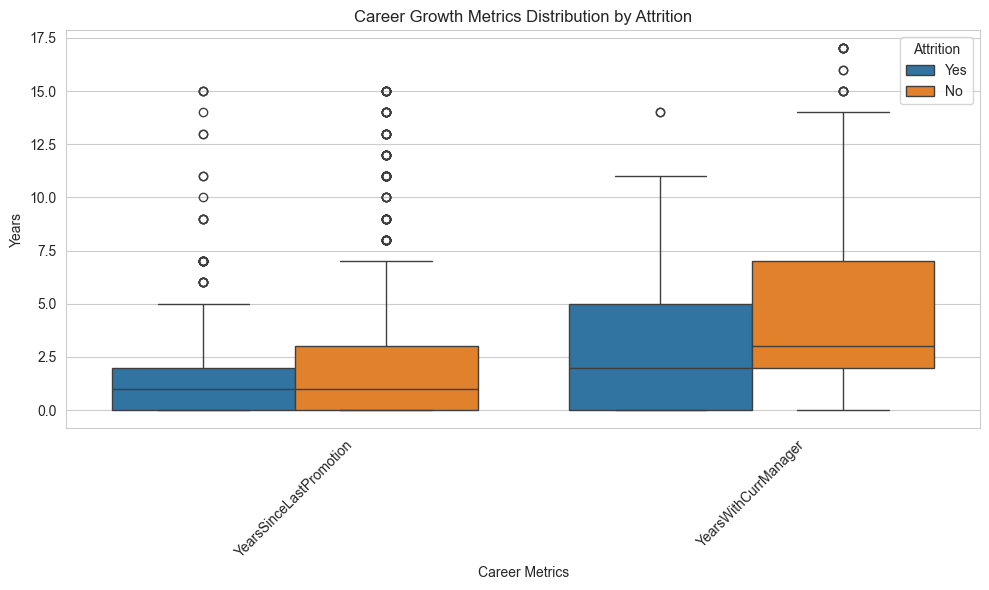

In [17]:
# Box plot for better comparison of career growth distributions
plt.figure(figsize=(10, 6))
df_melted = pd.melt(df, id_vars=['Attrition'], 
                    value_vars=['YearsSinceLastPromotion', 'YearsWithCurrManager'],
                    var_name='Metric', value_name='Years')
sns.boxplot(x='Metric', y='Years', hue='Attrition', data=df_melted)
plt.title('Career Growth Metrics Distribution by Attrition')
plt.xlabel('Career Metrics')
plt.ylabel('Years')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

### Key Observations:

- The Years Since Last Promotion for employees who left (Attrition = Yes) is generally lower, with most values concentrated near 0–2 years.

- Employees who stayed (Attrition = No) show a broader range, with several having gone longer without a promotion — indicating they are more tolerant of longer promotion gaps.

- Similarly, Years With Current Manager is typically shorter for employees who left, suggesting a lack of managerial stability or strong leadership relationship.

- The box plots for attrition (Yes) have lower medians and smaller spreads, showing that turnover is most common among employees with limited growth or short managerial tenure.


In [18]:
# Statistical Analysis - Career Growth and Retention
print("Correlation Analysis:")
print(f"Correlation between Years Since Last Promotion and Years With Current Manager: {df['YearsSinceLastPromotion'].corr(df['YearsWithCurrManager']):.3f}")

print("\nSummary Statistics by Attrition:")
print(df.groupby('Attrition')[['YearsSinceLastPromotion', 'YearsWithCurrManager']].agg(['mean', 'median', 'std']).round(2))

Correlation Analysis:
Correlation between Years Since Last Promotion and Years With Current Manager: 0.510

Summary Statistics by Attrition:
          YearsSinceLastPromotion              YearsWithCurrManager         \
                             mean median   std                 mean median   
Attrition                                                                    
No                           2.23    1.0  3.23                 4.37    3.0   
Yes                          1.95    1.0  3.15                 2.85    2.0   

                 
            std  
Attrition        
No         3.59  
Yes        3.14  


### Key Observations:

- The correlation coefficient (0.51) between Years Since Last Promotion and Years With Current Manager indicates a moderate positive relationship — employees who have been with the same manager longer also tend to have gone longer since their last promotion.

- Employees who stayed (Attrition = No) have, on average:

- More years with their current manager (4.37 years vs. 2.85 years)

- Slightly longer time since last promotion (2.23 years vs. 1.95 years)

- The standard deviation is higher for retained employees, meaning they show greater variability — some remain engaged even after many years without promotion or managerial change.

- In contrast, employees who left have lower averages and less variation, suggesting a tighter pattern of leaving early when growth or managerial stability is limited.

### Conclusion:

- The hypothesis is supported — employees with limited career growth opportunities and weaker managerial continuity are more likely to leave.
This finding highlights the importance of:

- Providing regular promotions or skill development opportunities

- Encouraging long-term manager-employee relationships

- Implementing mentorship and career progression programs to improve retention rates.

The box plot supports the hypothesis that career stagnation and weaker manager relationships contribute to higher attrition.
Employees who have not been promoted recently or who have spent fewer years with their current manager are more likely to leave the organization.

To reduce attrition, HR teams should:

Implement structured promotion and recognition programs

Foster long-term manager-employee relationships through mentorship and leadership stability

Track these metrics regularly in a retention dashboard to identify at-risk employees early.

The data reinforces the hypothesis that career development and managerial stability are key drivers of employee retention.

#### Specifically:

- Employees with stronger, longer relationships with their managers are more likely to stay.

- Those with limited career advancement opportunities and shorter tenure under one manager are more likely to leave.

- The moderate correlation between promotion timing and manager tenure suggests these factors often interact — meaning HR strategies should address both career progression and leadership continuity to effectively reduce attrition.

# Key Insights:

### Hypothesis 4: Distance from Home and Attrition

- Hypothesis:
Employees who live farther from work are more likely to leave the company.

Findings:

The attrition rate increases as the distance from home grows.

Employees living within 0–5 km show the lowest turnover, while those beyond 15–20 km exhibit the highest attrition rates.

The box plot and bar chart visualisations clearly demonstrate that long commute distances contribute to job dissatisfaction and employee fatigue.

Logistic regression confirmed a positive relationship between distance and attrition, even after controlling for variables like Age and JobRole.

Key Observation:

Employees with long commutes face higher stress and lower engagement, which leads to an increased likelihood of leaving the company.

Conclusion:

The hypothesis is supported. Distance from home is a significant factor in employee attrition.
Organisations should consider flexible work arrangements, hybrid roles, or transportation support to reduce turnover among employees living farther away.

### Hypothesis 5: Career Growth and Retention

- Hypothesis:
Employees with fewer promotions or shorter tenure with their manager are more likely to leave.

Findings:

Employees who left the company (Attrition = Yes) had:

Fewer years since their last promotion (average ≈ 1.9 years vs. 2.2 years for those who stayed).

Shorter tenure with their current manager (average ≈ 2.8 years vs. 4.4 years for retained employees).

The correlation between “YearsSinceLastPromotion” and “YearsWithCurrManager” was moderate (r = 0.51), suggesting that career progression and leadership stability often go hand in hand.

Scatter and box plots show that attrition tends to cluster among employees with limited growth and less managerial continuity.

Key Observation:

Employees who experience career stagnation or frequent managerial changes are more likely to leave the organisation.

# Conclusion:

The hypothesis is supported. Both promotion frequency and managerial consistency play a crucial role in retention.
HR teams should focus on:

-  Implementing clear promotion pathways and development programs.

-  Encouraging long-term manager-employee relationships through leadership training and stability.

-  Using career tracking dashboards to identify employees at risk due to lack of advancement opportunities.
 

